<a href="https://colab.research.google.com/github/abhi2003-drigger/CropForEst--Location-based-Crop-Prediction-and-Estimation/blob/main/crop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
price_df = pd.read_csv("price.csv")

temperature_df = pd.read_csv("merged.csv")

In [56]:
price_df['Price Date'] = pd.to_datetime(price_df['Price Date'],format="%d/%m/%Y")
temperature_df['datetime'] = pd.to_datetime(temperature_df['datetime'],format="%d/%m/%Y")

In [81]:
merged_df = pd.merge(price_df, temperature_df, left_on=['Market Name', 'Price Date'], right_on=['name', 'datetime'])

In [82]:
merged_df.drop(columns=['District Name','Variety','Sl no.','name','Price Date'], inplace=True)

In [83]:
merged_df.drop(columns=['Market Name','Commodity','Grade','datetime'], inplace=True)

In [84]:
merged_df

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),tempmax,tempmin,temp,dew,humidity,precip,windspeed
0,2100,2180,2140,21.5,13.0,16.1,13.6,86.0,0.0,14.4
1,2100,2160,2130,23.2,12.1,16.5,13.5,83.4,1.0,11.9
2,2100,2150,2120,20.7,11.4,14.7,12.4,87.0,0.0,12.2
3,2100,2160,2125,21.1,12.6,15.0,12.0,83.5,0.0,13.0
4,2100,2170,2130,20.3,10.4,14.7,11.7,82.5,0.0,7.9
...,...,...,...,...,...,...,...,...,...,...
841,2740,2780,2760,77.6,54.8,65.1,51.9,65.2,0.0,5.4
842,2680,2870,2750,77.1,55.5,64.6,53.4,68.9,0.0,5.1
843,2725,2765,2745,76.2,55.1,60.1,53.7,81.3,0.0,6.9
844,2725,2775,2755,73.7,52.1,59.5,48.8,70.5,0.0,5.1


In [85]:

merged_df.dropna()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),tempmax,tempmin,temp,dew,humidity,precip,windspeed
0,2100,2180,2140,21.5,13.0,16.1,13.6,86.0,0.0,14.4
1,2100,2160,2130,23.2,12.1,16.5,13.5,83.4,1.0,11.9
2,2100,2150,2120,20.7,11.4,14.7,12.4,87.0,0.0,12.2
3,2100,2160,2125,21.1,12.6,15.0,12.0,83.5,0.0,13.0
4,2100,2170,2130,20.3,10.4,14.7,11.7,82.5,0.0,7.9
...,...,...,...,...,...,...,...,...,...,...
841,2740,2780,2760,77.6,54.8,65.1,51.9,65.2,0.0,5.4
842,2680,2870,2750,77.1,55.5,64.6,53.4,68.9,0.0,5.1
843,2725,2765,2745,76.2,55.1,60.1,53.7,81.3,0.0,6.9
844,2725,2775,2755,73.7,52.1,59.5,48.8,70.5,0.0,5.1


In [86]:
merged_df.dropna()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),tempmax,tempmin,temp,dew,humidity,precip,windspeed
0,2100,2180,2140,21.5,13.0,16.1,13.6,86.0,0.0,14.4
1,2100,2160,2130,23.2,12.1,16.5,13.5,83.4,1.0,11.9
2,2100,2150,2120,20.7,11.4,14.7,12.4,87.0,0.0,12.2
3,2100,2160,2125,21.1,12.6,15.0,12.0,83.5,0.0,13.0
4,2100,2170,2130,20.3,10.4,14.7,11.7,82.5,0.0,7.9
...,...,...,...,...,...,...,...,...,...,...
841,2740,2780,2760,77.6,54.8,65.1,51.9,65.2,0.0,5.4
842,2680,2870,2750,77.1,55.5,64.6,53.4,68.9,0.0,5.1
843,2725,2765,2745,76.2,55.1,60.1,53.7,81.3,0.0,6.9
844,2725,2775,2755,73.7,52.1,59.5,48.8,70.5,0.0,5.1


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Min Price (Rs./Quintal)    846 non-null    int64  
 1   Max Price (Rs./Quintal)    846 non-null    int64  
 2   Modal Price (Rs./Quintal)  846 non-null    int64  
 3   tempmax                    846 non-null    float64
 4   tempmin                    846 non-null    float64
 5   temp                       846 non-null    float64
 6   dew                        846 non-null    float64
 7   humidity                   846 non-null    float64
 8   precip                     846 non-null    float64
 9   windspeed                  846 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 66.2 KB


<Axes: ylabel='Modal Price (Rs./Quintal)'>

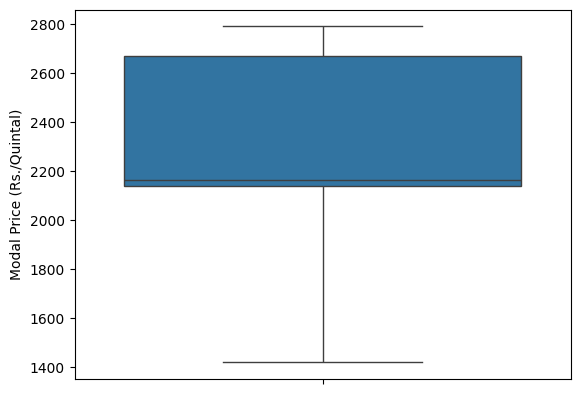

In [88]:
import seaborn as sns
sns.boxplot(merged_df['Modal Price (Rs./Quintal)'])

In [89]:
features=merged_df[['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','tempmax','tempmin','temp','dew','humidity','precip','windspeed']]
labels=merged_df['Modal Price (Rs./Quintal)']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=2)


In [91]:
print(X_train.shape)
print(X_test.shape)


(676, 9)
(170, 9)


In [92]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


In [72]:
# pip install scikit-learn


In [7]:
# from sklearn.datsets import make_regression

ModuleNotFoundError: No module named 'sklearn.datsets'

In [93]:
regr=RandomForestRegressor(max_depth=1000,random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=1000, random_state=0)

In [94]:
X_test[0:1]

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),tempmax,tempmin,temp,dew,humidity,precip,windspeed
226,2100,2140,29.6,16.7,22.8,16.4,68.8,0.0,7.2


In [96]:
y_pred=regr.predict(X_test)
y_pred

array([2116.75, 2140.15, 2141.55, 2157.6 , 2133.7 , 2100.55, 2143.5 ,
       2150.55, 2158.6 , 2172.3 , 2127.2 , 2086.35, 2616.95, 2152.85,
       2184.8 , 2114.4 , 2135.15, 2675.9 , 2163.05, 2179.95, 2152.65,
       2089.4 , 2148.5 , 2126.9 , 2127.25, 2608.25, 2087.5 , 2767.3 ,
       2140.95, 2737.9 , 2783.15, 2142.55, 2140.25, 2714.05, 2239.9 ,
       2205.75, 2169.25, 2709.75, 2151.2 , 2150.4 , 2162.85, 2667.75,
       2131.9 , 2148.9 , 2781.4 , 2748.95, 2140.15, 2150.  , 2151.3 ,
       2162.35, 2667.1 , 2248.9 , 2135.1 , 2760.15, 2240.4 , 2782.5 ,
       2184.3 , 2182.7 , 2738.4 , 2241.4 , 2759.95, 2609.75, 2150.4 ,
       2227.15, 2084.55, 2035.95, 2088.55, 2150.1 , 2749.25, 2745.8 ,
       2150.45, 2748.9 , 2144.9 , 2150.15, 2146.2 , 2714.5 , 2085.7 ,
       2140.8 , 2262.35, 2676.8 , 2128.35, 2163.85, 2143.15, 2159.75,
       2164.45, 2144.95, 2186.  , 2675.75, 2172.65, 2223.05, 2128.05,
       2151.8 , 2774.85, 2139.95, 2749.45, 2157.65, 2650.15, 2705.15,
       2748.9 , 2746

In [97]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_test,y_pred)

0.9676703469203264

In [100]:
user_input=[[2100,2140,29.6,16.7,22.8,16.4,68.8,0.0,7.2]]
regr.predict(user_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2116.75])